In [1]:
import pandas as pd
import numpy as np
import gspread
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
gc = gspread.service_account(filename='/home/gbotemi/Documents/gbotemi_bolarinwa/gspread-project/secret.json')

In [3]:
file = "https://docs.google.com/spreadsheets/d/1SUlcukpgxf6pfFQbj6DKQZXSlOhyBOSuBdbmQ2ZbhTM/edit?usp=sharing"

In [4]:
sh = gc.open_by_url(file)

In [5]:
worksheet = sh.get_worksheet(0)

In [6]:
data = pd.DataFrame(worksheet.get_all_records())

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15364 entries, 0 to 15363
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Permit Number                           15364 non-null  object 
 1   Permit Type                             15364 non-null  int64  
 2   Permit Type Definition                  15364 non-null  object 
 3   Permit Creation Date                    15364 non-null  object 
 4   Block                                   15364 non-null  object 
 5   Lot                                     15364 non-null  object 
 6   Street Number                           15364 non-null  int64  
 7   Street Number Suffix                    15364 non-null  object 
 8   Street Name                             15364 non-null  object 
 9   Street Suffix                           15364 non-null  object 
 10  Unit                                    15364 non-null  ob

In [8]:
data.shape

(15364, 43)

In [9]:
data.columns = data.columns.str.lower() # lower columns values


In [10]:
data.head()

,permit number,permit type,permit type definition,permit creation date,block,lot,street number,street number suffix,street name,street suffix,unit,unit suffix,description,current status,current status date,filed date,issued date,completed date,first construction document date,structural notification,number of existing stories,number of proposed stories,voluntary soft-story retrofit,fire only permit,permit expiration date,estimated cost,revised cost,existing use,existing units,proposed use,proposed units,plansets,tidf compliance,existing construction type,existing construction type description,proposed construction type,proposed construction type description,site permit,supervisor district,neighborhoods - analysis boundaries,zipcode,location,record id
0,201505000000.0,4,sign - erect,05/06/2015,326,23,140,,Ellis,St,,,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,,11/09/2015,,6,,,,11/03/2016,4000,4000,tourist hotel/motel,143,,,2,,3,constr type 3,,,,3,Tenderloin,94102,"(37.785719256680785, -122.40852313194863)",1.380610e+12
1,201604000000.0,4,sign - erect,04/19/2016,306,7,440,,Geary,St,0,,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,,08/03/2017,,7,,,,12/03/2017,1,500,tourist hotel/motel,,,,2,,3,constr type 3,,,,3,Tenderloin,94102,"(37.78733980600732, -122.41063199757738)",1.420160e+12
2,201605000000.0,3,additions alterations or repairs,05/27/2016,595,203,1647,,Pacific,Av,,,installation of separating wall,withdrawn,09/26/2017,05/27/2016,,,,,6,6,,,,20000,,retail sales,39,retail sales,39,2,,1,constr type 1,1,constr type 1,,3,Russian Hill,94109,"(37.7946573324287, -122.42232562979227)",1.424860e+12
3,201611000000.0,8,otc alterations permit,11/07/2016,156,11,1230,,Pacific,Av,0,,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,,2,2,,,07/13/2018,2000,2000,1 family dwelling,1,1 family dwelling,1,2,,5,wood frame (5),5,wood frame (5),,3,Nob Hill,94109,"(37.79595867909168, -122.41557405519474)",1.443570e+12
4,201611000000.0,6,demolitions,11/28/2016,342,1,950,,Market,St,,,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,,11/20/2017,,3,,,,12/01/2018,100000,100000,retail sales,,,,2,,3,constr type 3,,,,6,Tenderloin,94102,"(37.78315261897309, -122.40950883997789)",1.445480e+11


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15364 entries, 0 to 15363
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   permit number                           15364 non-null  object 
 1   permit type                             15364 non-null  int64  
 2   permit type definition                  15364 non-null  object 
 3   permit creation date                    15364 non-null  object 
 4   block                                   15364 non-null  object 
 5   lot                                     15364 non-null  object 
 6   street number                           15364 non-null  int64  
 7   street number suffix                    15364 non-null  object 
 8   street name                             15364 non-null  object 
 9   street suffix                           15364 non-null  object 
 10  unit                                    15364 non-null  ob

In [12]:
data = data.replace("", np.nan) #replace empty strings with numpy nan values

In [13]:
(data.isna().sum() / len(data)) * 100

permit number                               0.000000
permit type                                 0.000000
permit type definition                      0.000000
permit creation date                        0.000000
block                                       0.000000
lot                                         0.000000
street number                               0.000000
street number suffix                       98.958605
street name                                 0.000000
street suffix                               1.262692
unit                                       86.025775
unit suffix                                98.834939
description                                 0.162718
current status                              0.000000
current status date                         0.000000
filed date                                  0.000000
issued date                                 4.133038
completed date                             40.581880
first construction document date            4.

In [14]:
# Drop missing data that are over 60%   
# https://www.sciencedirect.com/science/article/pii/S0895435618308710#:~:text=Statistical%20guidance%20articles%20have%20stated,18%5D%2C%20%5B19%5D.

In [15]:
large_missing_dict = ((data.isna().sum() / len(data)) * 100).to_dict()

In [16]:
large_missing_cols = [idx for idx in large_missing_dict.keys() if large_missing_dict.get(idx) > 60]

In [17]:
large_missing_cols

['street number suffix',
 'unit',
 'unit suffix',
 'structural notification',
 'voluntary soft-story retrofit',
 'fire only permit',
 'tidf compliance',
 'site permit']

In [18]:
data = data.drop(columns=large_missing_cols)

In [19]:
small_missing_dict = ((data.isna().sum() / len(data)) * 100).to_dict()

In [20]:
small_missing_cols = [idx for idx in small_missing_dict.keys() if small_missing_dict.get(idx) > 0]

In [21]:
data[small_missing_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15364 entries, 0 to 15363
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   street suffix                           15170 non-null  object 
 1   description                             15339 non-null  object 
 2   issued date                             14729 non-null  object 
 3   completed date                          9129 non-null   object 
 4   first construction document date        14725 non-null  object 
 5   number of existing stories              12175 non-null  float64
 6   number of proposed stories              11978 non-null  float64
 7   permit expiration date                  11904 non-null  object 
 8   estimated cost                          12477 non-null  float64
 9   revised cost                            15117 non-null  float64
 10  existing use                            12266 non-null  ob

In [64]:
data[small_missing_cols].isna().sum() / len(data) * 100

street suffix                              1.261913
description                                0.000000
issued date                                4.166941
completed date                            40.506080
first construction document date           4.193230
number of existing stories                20.644101
number of proposed stories                21.846862
permit expiration date                    22.425238
estimated cost                            18.665790
revised cost                               1.623398
existing use                              20.046007
existing units                            25.363128
proposed use                              21.498521
proposed units                            25.967795
plansets                                  18.455472
existing construction type                20.979297
existing construction type description    20.979297
proposed construction type                22.050608
proposed construction type description    22.050608
supervisor d

In [63]:
data[small_missing_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 15215 entries, 0 to 15363
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   street suffix                           15023 non-null  object        
 1   description                             15215 non-null  object        
 2   issued date                             14581 non-null  datetime64[ns]
 3   completed date                          9052 non-null   datetime64[ns]
 4   first construction document date        14577 non-null  datetime64[ns]
 5   number of existing stories              12074 non-null  float64       
 6   number of proposed stories              11891 non-null  float64       
 7   permit expiration date                  11803 non-null  object        
 8   estimated cost                          12375 non-null  float64       
 9   revised cost                            14968 non-null 

In [23]:
data.duplicated().sum()

30

In [24]:
data = data.drop_duplicates(keep="first") # drop duplicated data

Todo: Convert data to datatime format

date col = ["Issued Date", "Completed Date", "First Construction Document Date", "Permit Expiration Date"]

In [59]:
data.columns

Index(['permit number', 'permit type', 'permit type definition',
       'permit creation date', 'block', 'lot', 'street number', 'street name',
       'street suffix', 'description', 'current status', 'current status date',
       'filed date', 'issued date', 'completed date',
       'first construction document date', 'number of existing stories',
       'number of proposed stories', 'permit expiration date',
       'estimated cost', 'revised cost', 'existing use', 'existing units',
       'proposed use', 'proposed units', 'plansets',
       'existing construction type', 'existing construction type description',
       'proposed construction type', 'proposed construction type description',
       'supervisor district', 'neighborhoods - analysis boundaries', 'zipcode',
       'location', 'record id'],
      dtype='object')

In [37]:
data[["zipcode", "location", "neighborhoods - analysis boundaries"]].isna().sum()
# looks like the following columns are correlated and would be best to drop the missing values. Imputing geolocation data might not be a very good idea

zipcode                                119
location                               118
neighborhoods - analysis boundaries    119
dtype: int64

In [39]:
data['location'].isna().sum()

118

In [43]:
data.shape

(15334, 35)

In [52]:
data = data[(data['location'].notnull()) & (data['zipcode'].notnull()) & (data['neighborhoods - analysis boundaries'].notnull())]

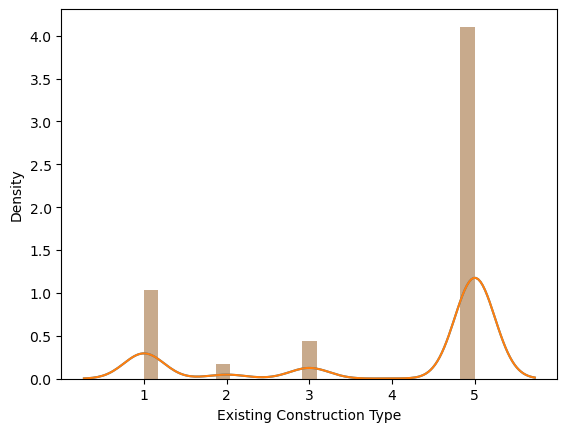

In [23]:
mode_existing_storries = data[small_missing_cols[15]].mode()

fig, ax = plt.subplots()
sns.distplot(data[small_missing_cols[15]], ax=ax, label="green")
sns.distplot(data[small_missing_cols[15]].fillna(mode_existing_storries), ax=ax, label="yellow")
plt.show()

In [58]:
data["issued date"] = pd.to_datetime(data["issued date"])
data["completed date"] = pd.to_datetime(data["completed date"])
data["first construction document date"] = pd.to_datetime(data["first construction document date"])
data["completed date"] = pd.to_datetime(data["completed date"])

In [59]:
data['description'] = data['description'].fillna("Unknown")

In [67]:
data[small_missing_cols].columns

Index(['street suffix', 'description', 'issued date', 'completed date',
       'first construction document date', 'number of existing stories',
       'number of proposed stories', 'permit expiration date',
       'estimated cost', 'revised cost', 'existing use', 'existing units',
       'proposed use', 'proposed units', 'plansets',
       'existing construction type', 'existing construction type description',
       'proposed construction type', 'proposed construction type description',
       'supervisor district', 'neighborhoods - analysis boundaries', 'zipcode',
       'location'],
      dtype='object')

In [70]:
data['number of proposed stories']

0        NaN
1        NaN
2        6.0
3        2.0
4        NaN
        ... 
15359    2.0
15360    2.0
15361    2.0
15362    2.0
15363    NaN
Name: number of proposed stories, Length: 15215, dtype: float64

In [31]:
from miceforest import ImputationKernel

In [65]:
# mice_kernel = ImputationKernel(data=data, save_all_iterations=True, random_state=42)
# mice_kernel.mice(2)

In [ ]:
#imputing

impute_data = data.copy()

In [ ]:
impute_col = impute_data.columns[impute_data.isnull().any()]

In [ ]:
# impute_data.loc[impute_data[target].isnull(), col_missing.to_list()]

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
for target in impute_col:

    col_missing = impute_data[impute_col].columns.difference([target])
    
    known_data = impute_data.loc[impute_data[target].notnull(), col_missing.to_list() + [target]]
    missing_data = impute_data.loc[impute_data[target].isnull(), col_missing.to_list()]
    # print(missing_data.head())

    X_known_data = known_data[col_missing]
    y_known_data = known_data[target]
    X_missing_data = missing_data[col_missing]

    regression_model = LGBMClassifier()

    regression_model.fit(X_known_data, y_known_data)
    preds = regression_model.predict(X_missing_data)
    impute_data.loc[impute_data[target].isnull(), target] = preds
    # print(col_missing.to_list() + [target])

ValueError: pandas dtypes must be int, float or bool.
Fields with bad pandas dtypes: Completed Date: object, Existing Construction Type Description: object, Existing Use: object, First Construction Document Date: object, Issued Date: object, Location: object, Neighborhoods - Analysis Boundaries: object, Permit Expiration Date: object, Proposed Construction Type Description: object, Proposed Use: object